<a href="https://colab.research.google.com/github/kszymon/seaborn-plotly/blob/main/seaborn-tut%20/02_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Churn Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Wstępne przetworzenie danych

In [15]:
TotalChargesMedian = df[df.TotalCharges != ' ']['TotalCharges'].astype('float32').median()

In [20]:
df['TotalCharges'][df['TotalCharges'] == ' '] = TotalChargesMedian

df['TotalCharges'] = df['TotalCharges'].astype('float32')

<ipython-input-20-ec4ffc97a326>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][df['TotalCharges'] == ' '] = TotalChargesMedian


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
if not df.isnull().sum().sum():
    print('Nie ma braków danych')

Nie ma braków danych


In [29]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'Contract', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in categorical:
    df[col] = pd.Categorical(df[col])

for col in numerical:
    df[col] = df[col].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float32 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [30]:
df = df.drop(columns=['customerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float32 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [31]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371147,64.761696,2281.916992
std,24.559708,30.089973,2265.270752
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.349998,1397.475098
75%,55.000000,89.849998,3786.599976
max,72.000000,118.750000,8684.799805


In [32]:
df.describe(include=['category'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Rozkład Churn

Churn
No     5174
Yes    1869
Name: count, dtype: int64


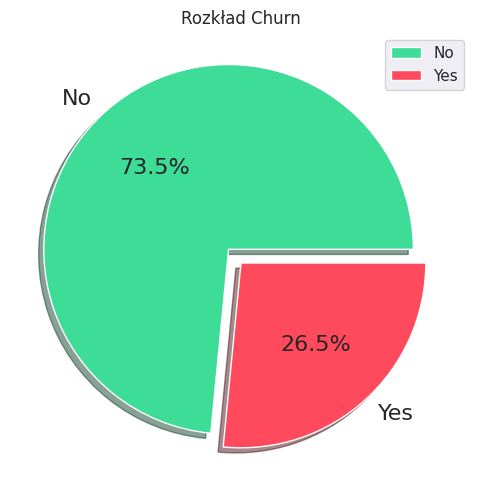

In [48]:
plt.figure(figsize=(8, 6))
sns.set()
df.Churn.value_counts().plot(kind='pie',
                            fontsize=16,
                            colors=['#3DDC97', '#FF495C'],
                             explode=[0.1, 0],
                             shadow=True,
                             autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozkład Churn')
print(df.Churn.value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64


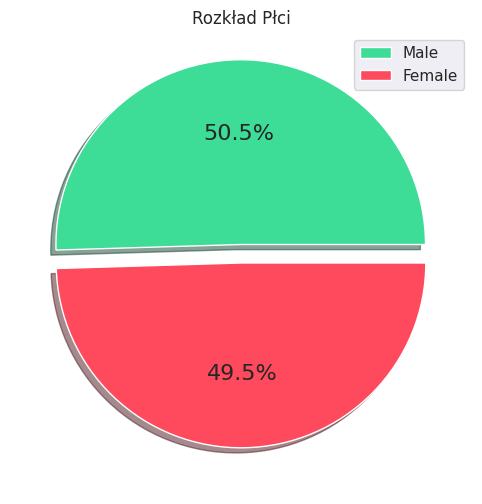

In [54]:
plt.figure(figsize=(8, 6))
sns.set()
df.gender.value_counts().plot(kind='pie',
                            fontsize=16,
                              labels=['',''],
                            colors=['#3DDC97', '#FF495C'],
                             explode=[0.1, 0],
                             shadow=True,
                             autopct='%1.1f%%')
plt.legend(['Male','Female'])
plt.ylabel('')
plt.title('Rozkład Płci')
print(df.gender.value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


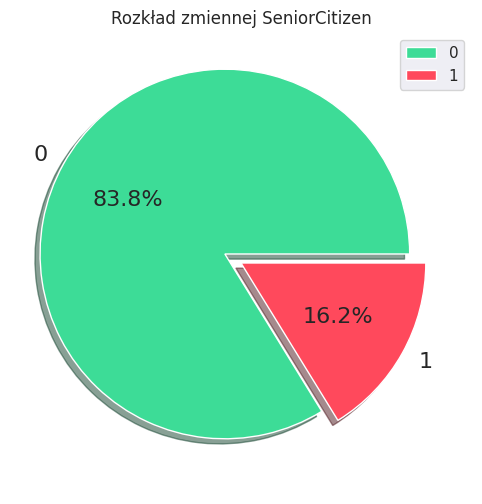

In [56]:
plt.figure(figsize=(8, 6))
df.SeniorCitizen.value_counts().plot( kind='pie',
                                     fontsize=16,
                                      colors=['#3DDC97', '#FF495C'],
                                      explode=[0.1, 0],
                                      shadow=True,
                                      autopct='%1.1f%%'
                                      )
plt.legend()
plt.ylabel('')
plt.title('Rozkład zmiennej SeniorCitizen')
print(df.SeniorCitizen.value_counts())

### Rozkłady

<ipython-input-61-637d5724106b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MonthlyCharges, bins=30)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

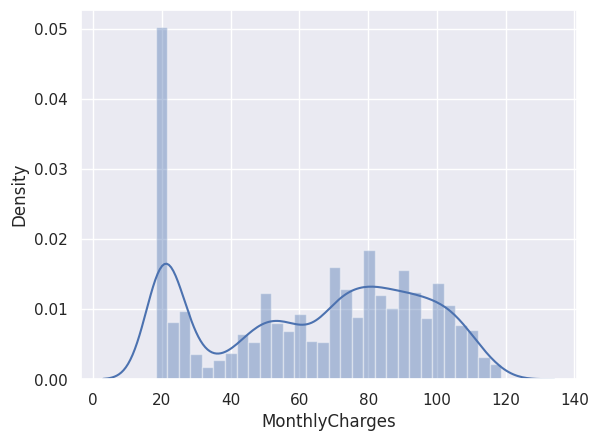

In [61]:
sns.distplot(df.MonthlyCharges, bins=30)

<ipython-input-62-e2ba94fe456e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TotalCharges, bins=30)


<Axes: xlabel='TotalCharges', ylabel='Density'>

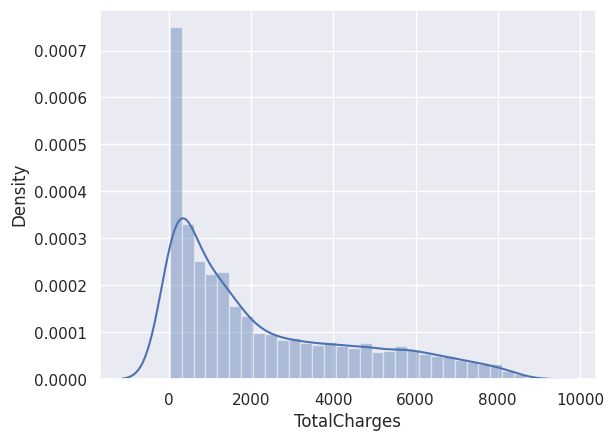

In [62]:
sns.distplot(df.TotalCharges, bins=30)

<ipython-input-72-cf1a55313710>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MonthlyCharges, bins=30, ax=ax[0])
<ipython-input-72-cf1a55313710>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure, bins=30, ax=ax[1])


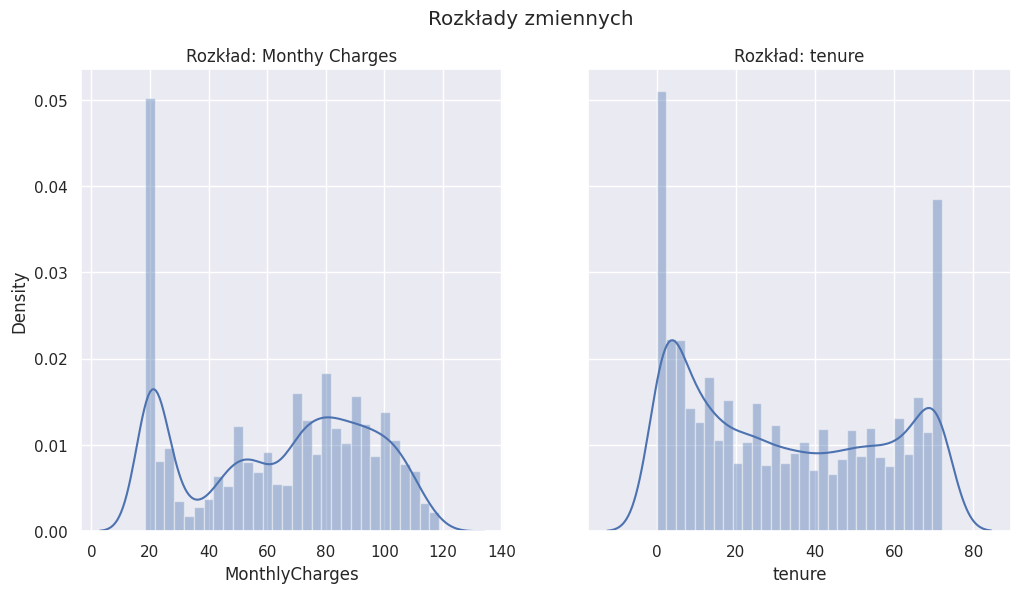

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))
sns.distplot(df.MonthlyCharges, bins=30, ax=ax[0])
sns.distplot(df.tenure, bins=30, ax=ax[1])

fig.suptitle('Rozkłady zmiennych')
ax[0].title.set_text('Rozkład: Monthy Charges')
ax[1].title.set_text('Rozkład: tenure')

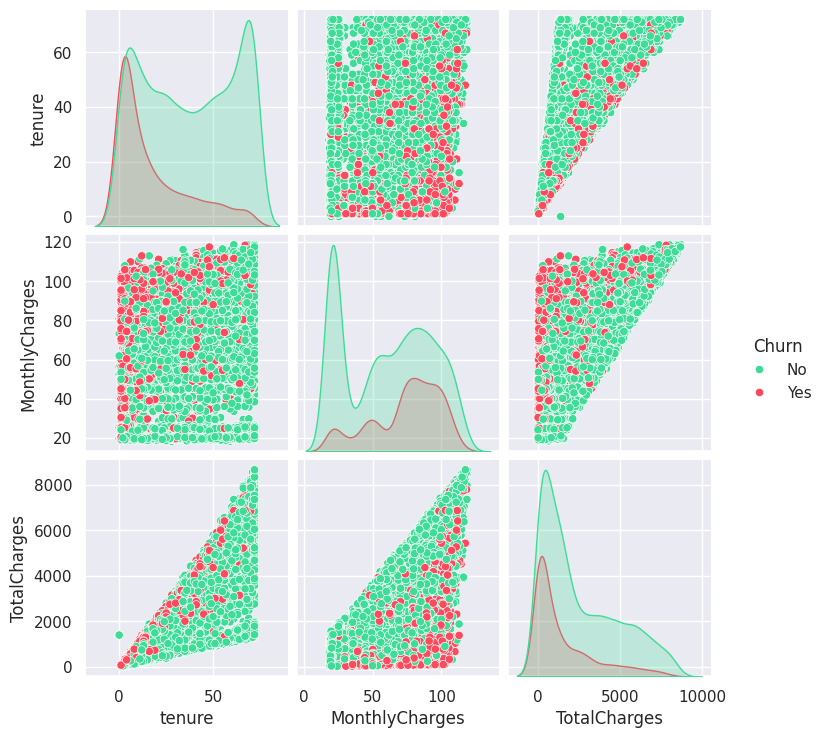

In [80]:
sns.pairplot(data=df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'],
             hue='Churn', palette=['#3DDC97', '#FF495C'])

<ipython-input-84-f4cb034dc06b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='Churn', y='MonthlyCharges',


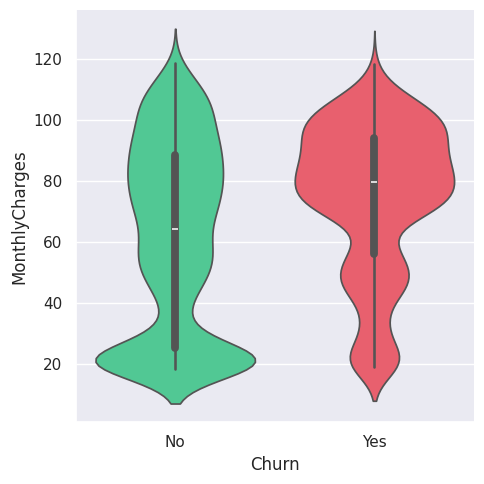

In [84]:
sns.catplot(data=df, x='Churn', y='MonthlyCharges',
           kind='violin', palette=['#3DDC97', '#FF495C'])

### Macierz Korelacji

In [88]:
numerical_features = df.select_dtypes(include=['number'])
numerical_features.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


<Axes: >

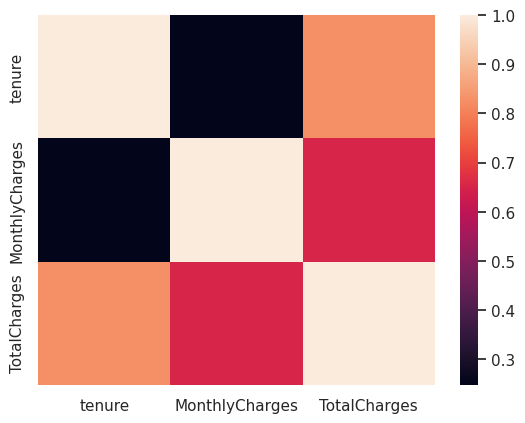

In [87]:
numerical_features = df.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr())